# Load Data into data frames

In [1]:
import pandas as pd

train_df = pd.read_csv('/content/train.csv')
validation_df = pd.read_csv('/content/validation.csv')
test_df = pd.read_csv('/content/test.csv')


# Vectorization

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer


def vectorize_text(data):
    # Fill NaN values with empty string to ensure TfidfVectorizer can process the data
    data_filled = data.fillna("")
    vectorizer = TfidfVectorizer()
    return vectorizer.fit_transform(data_filled)

X_train_vec = vectorize_text(train_df['message'])
X_val_vec = vectorize_text(validation_df['message'])
X_test_vec = vectorize_text(test_df['message'])

y_train = train_df['label']
y_val = validation_df['label']
y_test = test_df['label']


# Building Different Models

## 1. Logistic Regression

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


# Handling NaN values by replacing them with an empty string
train_df['message'] = train_df['message'].fillna('')

# Split the data
X_train, X_val, y_train, y_val = train_test_split(train_df['message'], train_df['label'], test_size=0.2, random_state=42)

# Vectorize the data
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec = vectorizer.transform(X_val)

# Grid Search to find the best Logistic Regression model
parameters = {'C': [0.1, 1, 10]}
grid_search = GridSearchCV(LogisticRegression(), parameters, cv=5)
grid_search.fit(X_train_vec, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10]})

## Calculating Train score and Validation score

In [4]:
# Evaluate the best model found by Grid Search on the validation data
best_model = grid_search.best_estimator_
train_score_finetuned = best_model.score(X_train_vec, y_train)
validation_score_finetuned = best_model.score(X_val_vec, y_val)

print("Train Score with Fine-tuned Model:", validation_score_finetuned)
print("Validation Score with Fine-tuned Model:", validation_score_finetuned)

Train Score with Fine-tuned Model: 0.9671150971599403
Validation Score with Fine-tuned Model: 0.9671150971599403


## Evaluating on Test Data

Accuracy: 0.9776
Precision: 0.9924
Recall: 0.8442
F1 Score: 0.9123


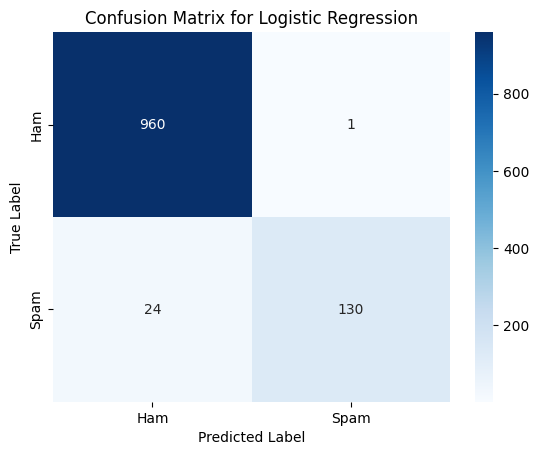

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

test_df['message'] = test_df['message'].fillna('')  # Handle any NaN values
X_test_vec = vectorizer.transform(test_df['message'])
y_test = test_df['label']

# Make predictions
y_pred = best_model.predict(X_test_vec)

# Calculate metrics
accuracy_lr = accuracy_score(y_test, y_pred)
precision_lr = precision_score(y_test, y_pred)
recall_lr = recall_score(y_test, y_pred)
f1_lr = f1_score(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1 Score: {f1_lr:.4f}")

# Generate and display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


## 2. Naive Bayes Classifier

## Grid Search on Naive Bayes

In [6]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

parameters = {'alpha': [0.01, 0.1, 1, 10]}
mnb = MultinomialNB()
clf = GridSearchCV(mnb, parameters, cv=5)
clf.fit(X_train_vec, y_train)
print("Best Alpha:", clf.best_params_)


Best Alpha: {'alpha': 0.1}


## Calculating Training & Validation scores

In [7]:
# Retrieve the best model from GridSearchCV
best_nb_model = clf.best_estimator_

# Calculate training score
y_train_pred = best_nb_model.predict(X_train_vec)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Calculate validation score
y_val_pred = best_nb_model.predict(X_val_vec)
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)


Training Accuracy: 0.9977553310886644
Validation Accuracy: 0.9745889387144993


## Calculate evaluation metrics

In [8]:
y_test_pred = best_nb_model.predict(X_test_vec)

# Calculate metrics
accuracy_nb = accuracy_score(y_test, y_test_pred)
precision_nb = precision_score(y_test, y_test_pred)
recall_nb = recall_score(y_test, y_test_pred)
f1_nb = f1_score(y_test, y_test_pred)

# Print metrics
print(f"Test Accuracy: {accuracy_nb:.4f}")
print(f"Test Precision: {precision_nb:.4f}")
print(f"Test Recall: {recall_nb:.4f}")
print(f"Test F1 Score: {f1_nb:.4f}")


Test Accuracy: 0.9830
Test Precision: 1.0000
Test Recall: 0.8766
Test F1 Score: 0.9343


## Generate and plot confusion matrix

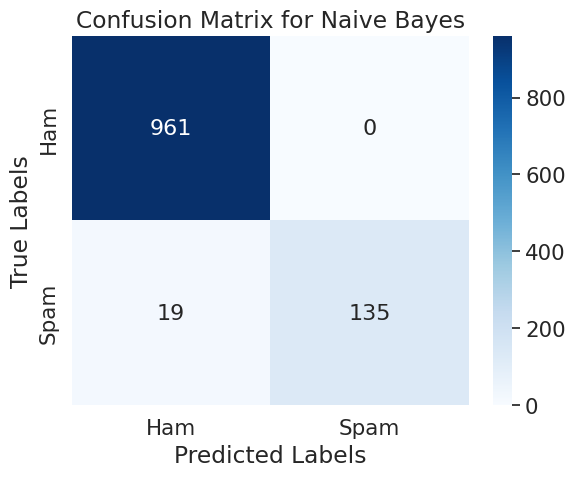

In [9]:
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
sns.set(font_scale=1.4)  # for label size
sns.heatmap(conf_matrix_test, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])  # font size
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Naive Bayes')
plt.show()


## 3. Ada Boost on Decision Tree

In [10]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1))
clf = GridSearchCV(ada, parameters, cv=5)


## Fit adaboosted model and evaluate on train+validation data

In [11]:
# Fit and find the best hyperparameters
clf.fit(X_train_vec, y_train)
print("Best Hyperparameters:", clf.best_params_)
best_ada_model = clf.best_estimator_

# Predict on the training data
y_train_pred = best_ada_model.predict(X_train_vec)
# Predict on the validation data
y_val_pred = best_ada_model.predict(X_val_vec)

# Calculate accuracy on the training data
train_accuracy = accuracy_score(y_train, y_train_pred)
# Calculate accuracy on the validation data
val_accuracy = accuracy_score(y_val, y_val_pred)

# Print the accuracies
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")


Best Hyperparameters: {'learning_rate': 1, 'n_estimators': 200}
Training Accuracy: 0.9600
Validation Accuracy: 0.9417


## Predict on test data

In [12]:
# Predict on the test data
y_test_pred = best_ada_model.predict(X_test_vec)

# Calculate evaluation metrics
test_accuracy_ada = accuracy_score(y_test, y_test_pred)
test_precision_ada = precision_score(y_test, y_test_pred)
test_recall_ada = recall_score(y_test, y_test_pred)
test_f1_ada = f1_score(y_test, y_test_pred)

## Display metrics and confusion matrix

Test Accuracy: 0.9453
Test Precision: 0.9429
Test Recall: 0.6429
Test F1 Score: 0.7645


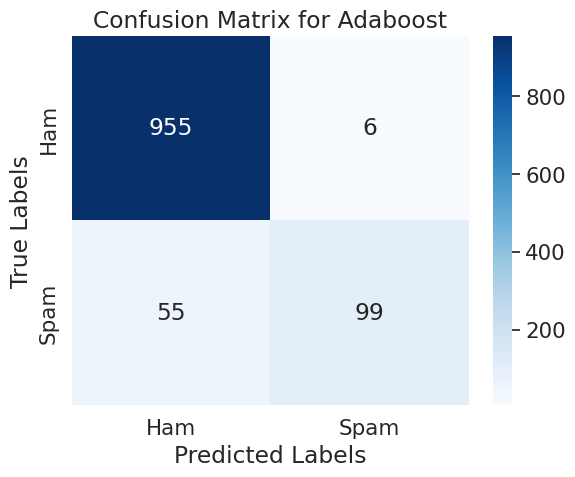

In [13]:
# Display metrics
print(f"Test Accuracy: {test_accuracy_ada:.4f}")
print(f"Test Precision: {test_precision_ada:.4f}")
print(f"Test Recall: {test_recall_ada:.4f}")
print(f"Test F1 Score: {test_f1_ada:.4f}")

# Plot confusion matrix
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Adaboost')
plt.show()

In [16]:
# Example metric values for each model
data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'LR': [accuracy_lr, precision_lr, recall_lr, f1_lr],
    'MNB': [accuracy_nb, precision_nb, recall_nb, f1_nb],
    'ADA': [test_accuracy_ada, test_precision_ada, test_recall_ada, test_f1_ada]
}

# Create a DataFrame
df = pd.DataFrame(data)


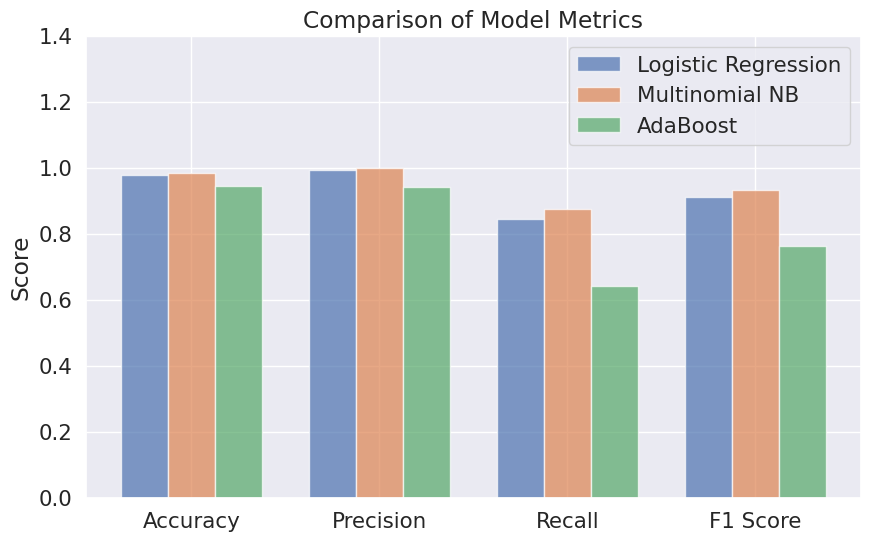

In [21]:
# Setting the positions and width for the bars
positions = list(range(len(df['Metric'])))
width = 0.25

# Plotting each metric
fig, ax = plt.subplots(figsize=(10, 6))
plt.bar(positions, df['LR'], width, label='Logistic Regression', alpha=0.7)
plt.bar([p + width for p in positions], df['MNB'], width, label='Multinomial NB', alpha=0.7)
plt.bar([p + width * 2 for p in positions], df['ADA'], width, label='AdaBoost', alpha=0.7)

# Adding some aesthetics
ax.set_xticks([p + width for p in positions])
ax.set_xticklabels(df['Metric'])
plt.ylim(0, 1.4) # upper limit changed from 1 to 1.4 to make space for legend
plt.ylabel('Score')
plt.title('Comparison of Model Metrics')
plt.legend()

# Display the plot
plt.show()
